# Sumario

- [1. Introdução](#1)
  - [1.1. Instalação de Pacotes Python](#11)
  - [1.2. Importação das Bibliotecas](#12)
- [2. Carregamento dos Dados](#2)
  - [2.1. Carregando Arquivo](#21)
  - [2.2. Tamanho do DataFrame](#22)
  - [2.2. Dados Faltantes ou Nulos](#22)
  - [2.4. Análise do tipo de dado](#24)
  - [2.5. Verificando o Alvo](#25)
- [3. Análise Exploratória dos Dados](#3)
  - [3.1. Tabela de Estatística descritiva](#31)
  - [3.2. Visualizacao Gráfica](#32)
    - [3.2.1. Graficos de linhas com marcadores](#321)
    - [3.2.2. Histgramas](#322)
    - [3.2.3. Boxplox](#323)
    - [3.2.4. Matriz de correlação linear](#324)

<a id='1'></a>
# 1. introdução

Os sensores desempenham um papel fundamental na Indústria 4.0, pois são responsáveis por transformar fenômenos físicos em dados digitais, permitindo que máquinas, sistemas e processos se tornem inteligentes e autônomos. Eles viabilizam a coleta contínua e precisa de informações sobre variáveis como temperatura, pressão, vibração, umidade, entre outras, essenciais para o monitoramento e controle em tempo real das operações industriais.

Essa capacidade de sensoriamento possibilita a implementação de soluções avançadas, como manutenção preditiva, otimização de processos, redução de falhas e aumento da eficiência produtiva. Além disso, os sensores são a base para a integração entre o mundo físico e digital, permitindo a criação de sistemas ciberfísicos, essenciais para a tomada de decisões automatizadas e a flexibilização da produção.

Em resumo, os sensores são os elementos-chave que impulsionam a transformação digital nas indústrias, tornando possível a evolução para fábricas inteligentes, mais produtivas, seguras e sustentáveis.



<a id='11'></a>
## 1.1. instalação dos pacostes python

In [94]:
#!pip install pandas
#!pip install seaborn
#!pip install matplotlib
#!pip install scipy
#!pip install scikit-learn

<a id='12'></a>
## 1.2. importação das bibliotecas

In [19]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Estatísticas e operações matemáticas
from statistics import mode, StatisticsError
from scipy import stats

# Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

# Ambientes interativos
from IPython.display import display

# Controle de avisos
import warnings
warnings.filterwarnings("ignore")

# Machine Learning - Pré-processamento e treino/teste
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modelos de classificação
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Avaliação de modelos
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay,
    precision_score, recall_score, f1_score
)

<a id='2'></a>
# 2. carregando dados

<a id='21'></a>
## 2.1. carregando arquivo

Este código acessa uma API que fornece dados de sensores, converte os dados em um DataFrame do pandas para facilitar a análise, exibe um resumo estatístico dos dados e salva o resultado em um arquivo CSV para uso posterior.

In [22]:
import requests
import pandas as pd

# URL da sua API
url = "https://api-reply-6cd07329c208.herokuapp.com/api/dados-sensores/"

# Faz a requisição GET
response = requests.get(url)

# Verifica se a resposta foi bem-sucedida
if response.status_code == 200:
    data = response.json()  # Converte para JSON
    
    # Converte JSON para DataFrame
    df = pd.DataFrame(data)
    
    # Exibe as primeiras linhas
    print("Prévia dos dados:")
    display(df)
    
    # Salva em CSV
    df.to_csv("dados_sensores.csv", index=False)
    print("Arquivo CSV salvo como 'dados_sensores.csv'")
else:
    print(f"Erro ao acessar API: {response.status_code}")


Prévia dos dados:


,id,timestamp,temperatura,vibracao,corrente,velocidade,posicao,pressao,nivel,qualidade_ar,umidade,tensao,fumaca
0,1,2025-06-07T18:22:00.542865Z,25.3,0.02,1.5,120,45,101.3,75,80,60.0,220.0,0
1,2,2025-06-08T00:51:20.487094Z,38.1,4.50,7.0,1068,1,7.0,3,410,42.5,224.0,0
2,3,2025-06-08T00:51:32.000514Z,35.5,0.90,6.1,1165,0,7.8,18,304,37.7,213.2,0
3,4,2025-06-08T00:53:20.913343Z,35.0,2.80,3.2,1219,1,7.4,24,386,46.2,222.7,0
4,5,2025-06-08T00:53:41.701267Z,38.3,4.00,4.4,1443,0,4.6,98,202,45.3,212.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,80,2025-06-08T01:21:47.010607Z,37.6,1.60,6.3,1499,3,4.7,38,305,43.0,221.9,0
79,81,2025-06-08T01:21:59.918306Z,37.0,1.90,3.2,1463,3,6.5,28,421,40.9,222.7,1
80,82,2025-06-08T01:22:10.696739Z,38.0,3.60,5.5,1010,2,7.5,13,291,39.6,225.7,0
81,83,2025-06-08T01:22:21.416651Z,39.9,4.60,6.0,1052,0,7.6,44,473,45.9,224.5,0


Arquivo CSV salvo como 'dados_sensores.csv'


<a id='22'></a>
## 2.2. Tamanho do data frame

O primeiro passo em qualquer análise de dados é entender a estrutura do conjunto de dados disponível. Para isso, utilizamos o comando:

```python
df.shape
```

In [25]:
# Indica qual o "tamanho" o DataFrame (linhas, colunas)
df.shape

(83, 13)

<a id='23'></a>
## 2.3. Dados Faltante ou Nulos

Uma etapa fundamental na preparação dos dados é verificar se existem **valores ausentes (nulos)** nas colunas do DataFrame. Para isso, utilizamos comandos como:

```python
df.isnull().sum()
```

In [28]:
# Exiber se tem dados faltantes ou nulos
df.isnull().sum()  # Retorna a soma de valores nulos em cada coluna do DataFrame

id              0
timestamp       0
temperatura     0
vibracao        0
corrente        0
velocidade      0
posicao         0
pressao         0
nivel           0
qualidade_ar    0
umidade         0
tensao          0
fumaca          0
dtype: int64

Interpretação dos resultados:

id, timestamp: Não há dados ausentes nos identificadores nem nos registros temporais.

temperatura, vibracao, corrente, velocidade, posicao, pressao, nivel, qualidade_ar, umidade, tensao, fumaca: Todas as medições e variáveis monitoradas estão completas, sem valores faltantes.

Conclusão: Nenhuma coluna do conjunto de dados apresenta valores ausentes. Isso indica que não será necessário aplicar técnicas de imputação ou remoção de registros incompletos, facilitando e aumentando a confiabilidade das próximas etapas de análise.

<a id='24'></a>
## 2.4. Análise do tipo de dado

A seguir, analisamos os tipos de dados de cada coluna do DataFrame utilizando:

```python
df.dtypes


In [60]:
#Apresenta qual tipo de dado por variável
df.dtypes

id                int64
timestamp        object
temperatura     float64
vibracao        float64
corrente        float64
velocidade        int64
posicao           int64
pressao         float64
nivel             int64
qualidade_ar      int64
umidade         float64
tensao          float64
fumaca            int64
dtype: object

Interpretação dos tipos de dados:

id, velocidade, posicao, nivel, qualidade_ar, fumaca: São variáveis do tipo inteiro (int64), indicando que armazenam valores numéricos discretos, 
contagens ou categorias codificadas.

timestamp: Está no formato object, ou seja, como texto. armazena datas e horários, e pode ser necessário converter para um formato datetime para análises temporais.

temperatura, vibracao, corrente, pressao, umidade, tensao: São do tipo decimal (float64), apropriados para valores contínuos que medem grandezas físicas.

Conclusão: Os tipos de dados estão coerentes com o esperado para cada variável. Caso seja necessário trabalhar com séries temporais, recomenda-se converter a coluna timestamp para o tipo datetime. Isso facilitará manipulações e análises baseadas no tempo.

<a id='25'></a>
## 2.5. Verificando o Alvo 

In [35]:
# Retorna uma série contendo a frequência de cada linha distinta no Dataframe
df_s = df[['fumaca']].value_counts()
df_s

fumaca
0         50
1         33
Name: count, dtype: int64

<a id='3'></a>
# 3. Análise Exploratória dos dados

<a id='31'></a>
## 3.1 Tabela de estatística descritiva

In [38]:
df.describe()

,id,temperatura,vibracao,corrente,velocidade,posicao,pressao,nivel,qualidade_ar,umidade,tensao,fumaca
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,42.000000,37.174699,2.582169,5.293976,1218.120482,2.144578,7.577108,43.156627,338.265060,45.349398,220.531325,0.397590
std,24.103942,1.958524,1.469113,1.549614,193.768746,4.876856,10.521631,30.165188,86.126691,9.058016,6.075278,0.492375
min,1.000000,25.300000,0.020000,1.500000,120.000000,0.000000,4.100000,2.000000,80.000000,30.100000,210.100000,0.000000
25%,21.500000,36.000000,1.200000,4.000000,1082.000000,1.000000,5.200000,21.000000,276.500000,38.100000,215.300000,0.000000
50%,42.000000,37.400000,2.700000,5.000000,1219.000000,2.000000,6.700000,32.000000,330.000000,45.900000,221.100000,0.000000
75%,62.500000,38.500000,3.750000,6.900000,1367.000000,3.000000,7.750000,71.000000,409.000000,53.450000,226.150000,1.000000
max,83.000000,39.900000,4.900000,7.800000,1499.000000,45.000000,101.300000,98.000000,480.000000,60.000000,229.700000,1.000000


<a id='32'></a>
# 3.2. Visualização Gráfica

<a id='321'></a>
### 3.2.1. Graficos de linha com marcadores

este trecho de código cria graficos de linha com marcadores para cada varivel,
mostrando sua evolução ao longo do tempo com base na coluna "timestamp"

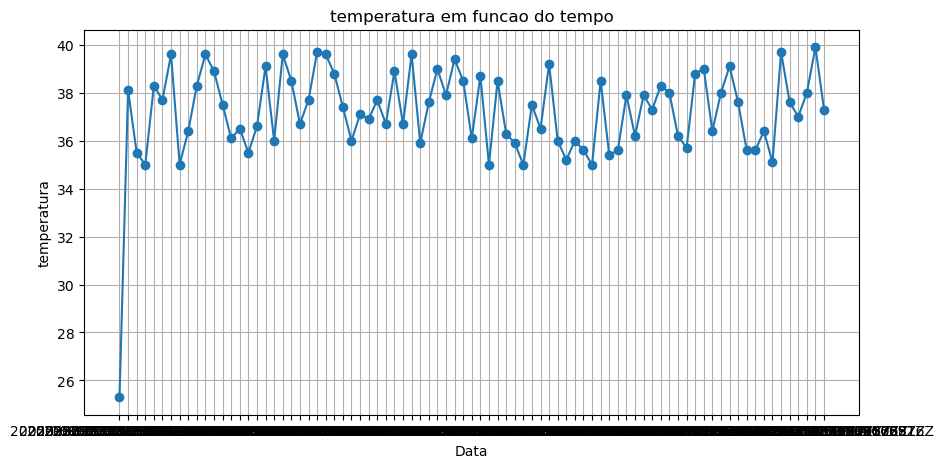

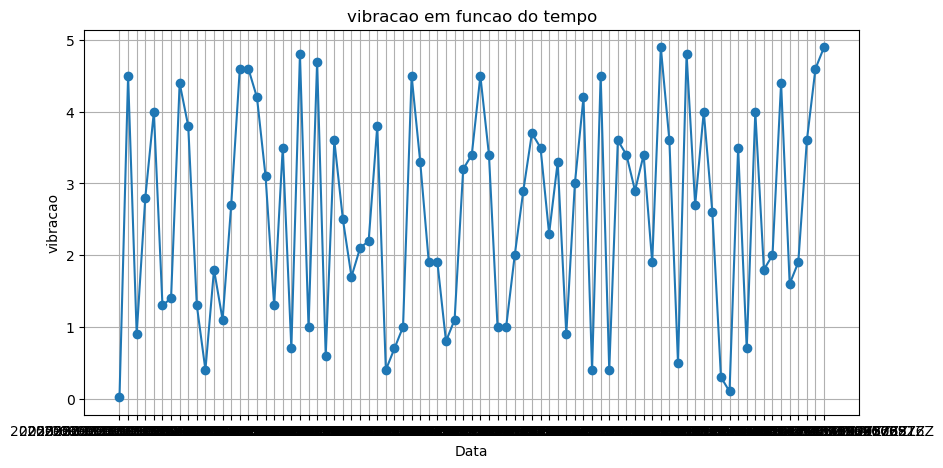

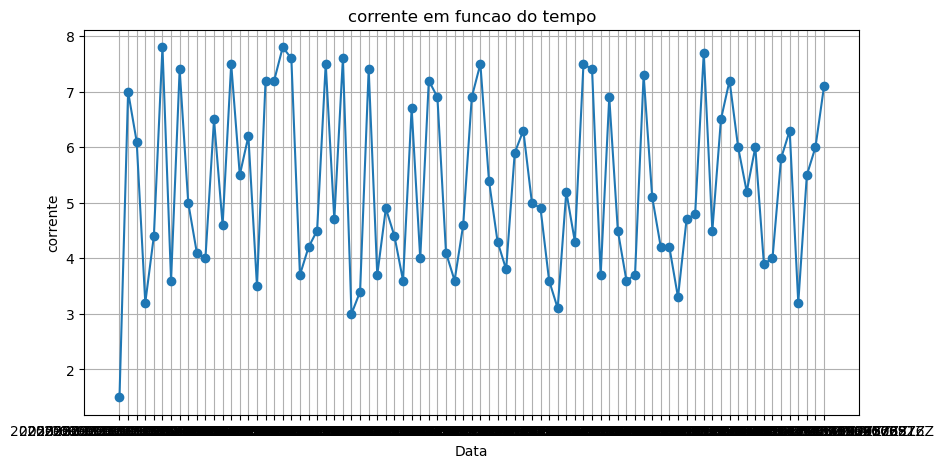

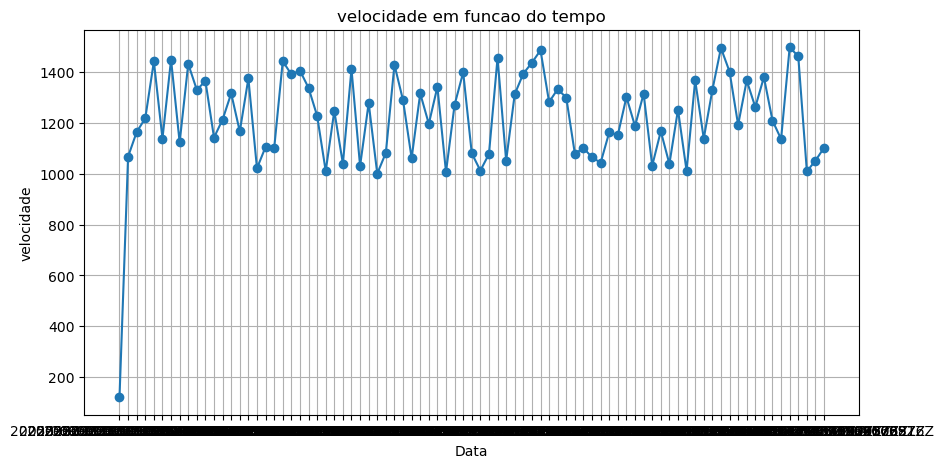

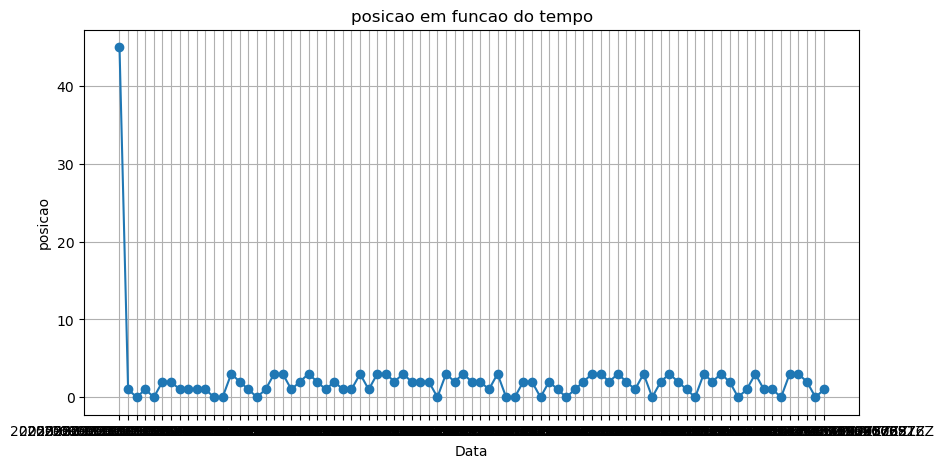

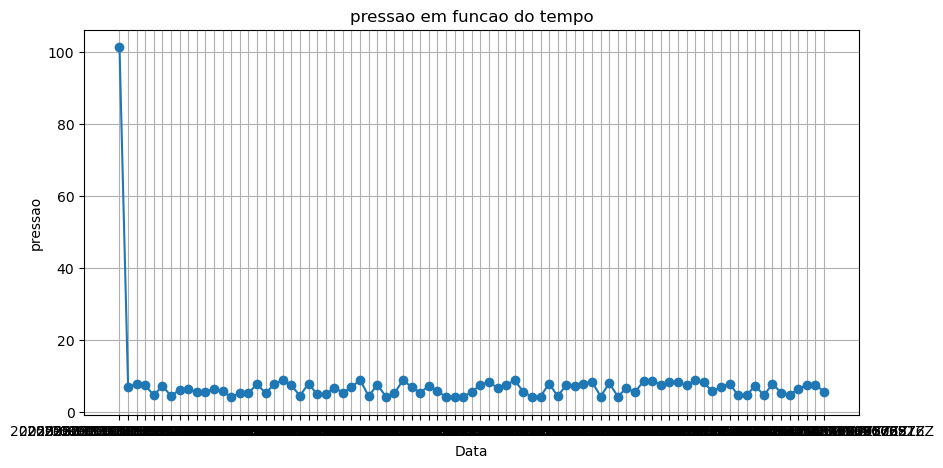

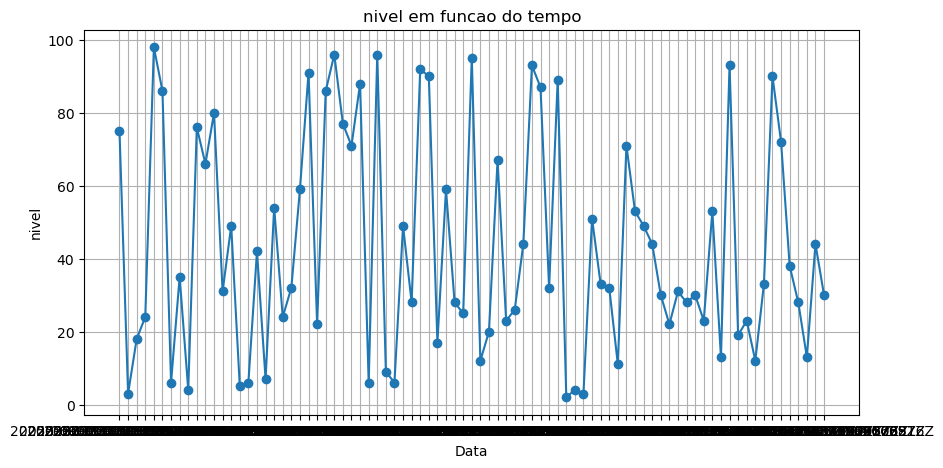

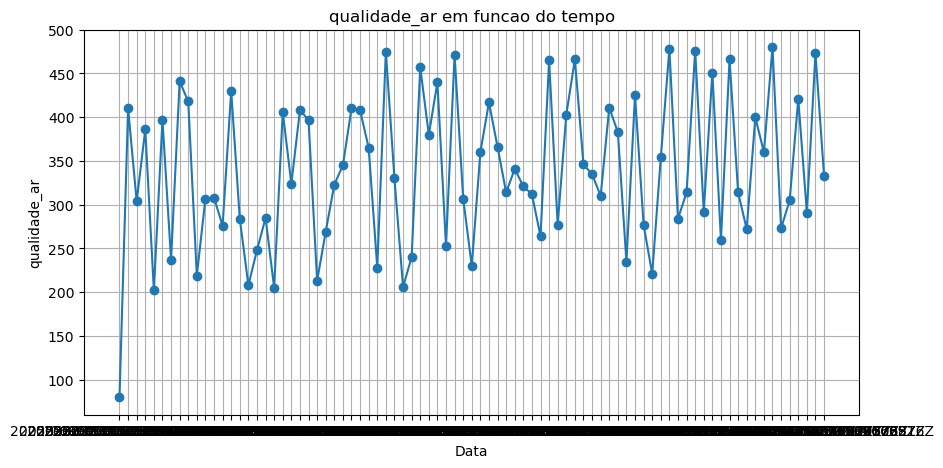

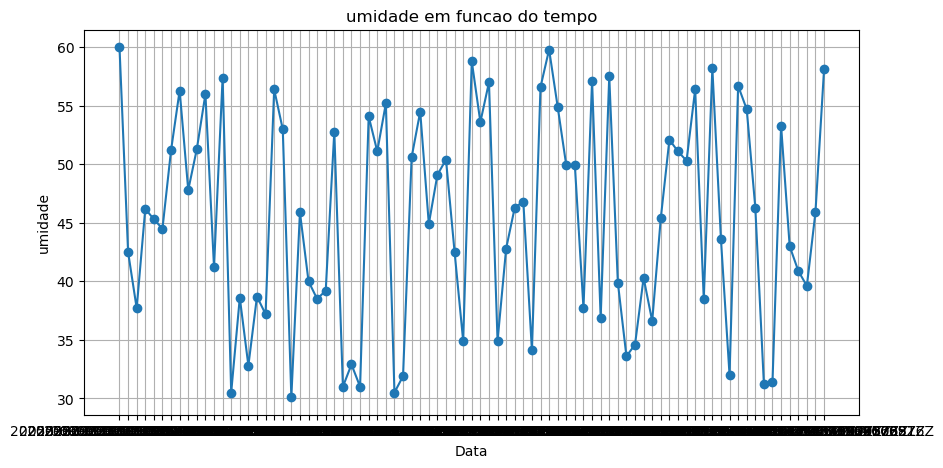

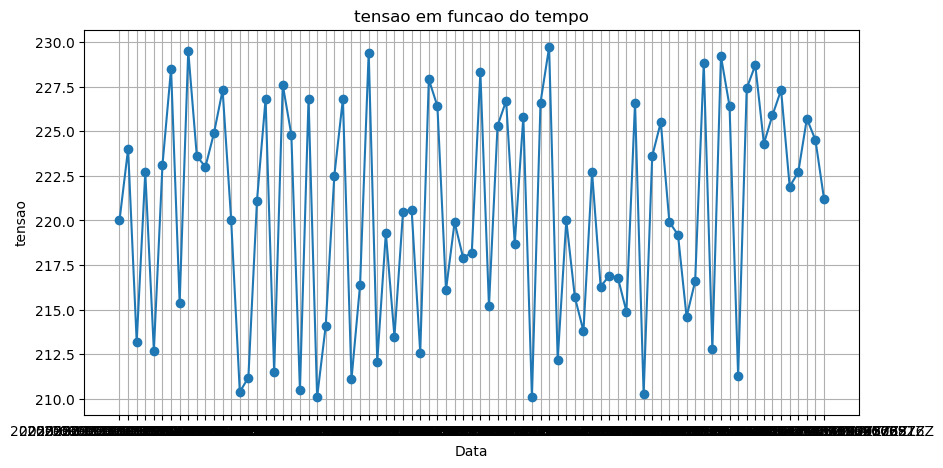

In [74]:
cols_to_plot = [
    'temperatura', 'vibracao', 'corrente', 'velocidade', 'posicao',
    'pressao', 'nivel', 'qualidade_ar', 'umidade', 'tensao'
]

for col in cols_to_plot:
    plt.figure(figsize=(10, 5))
    plt.plot(df["timestamp"], df[f'{col}'], marker='o', linestyle='-')
    plt.title(f"{col} em funcao do tempo")
    plt.xlabel('Data')
    plt.ylabel(f'{col}')
    plt.grid(True)
    plt.show()
   
   


<a id='322'></a>
### 3.2.2. Histogramas

este trecho de código cria graficos de histogramas para cada variavel, mnostrando sua evolução ao longo do tempo 

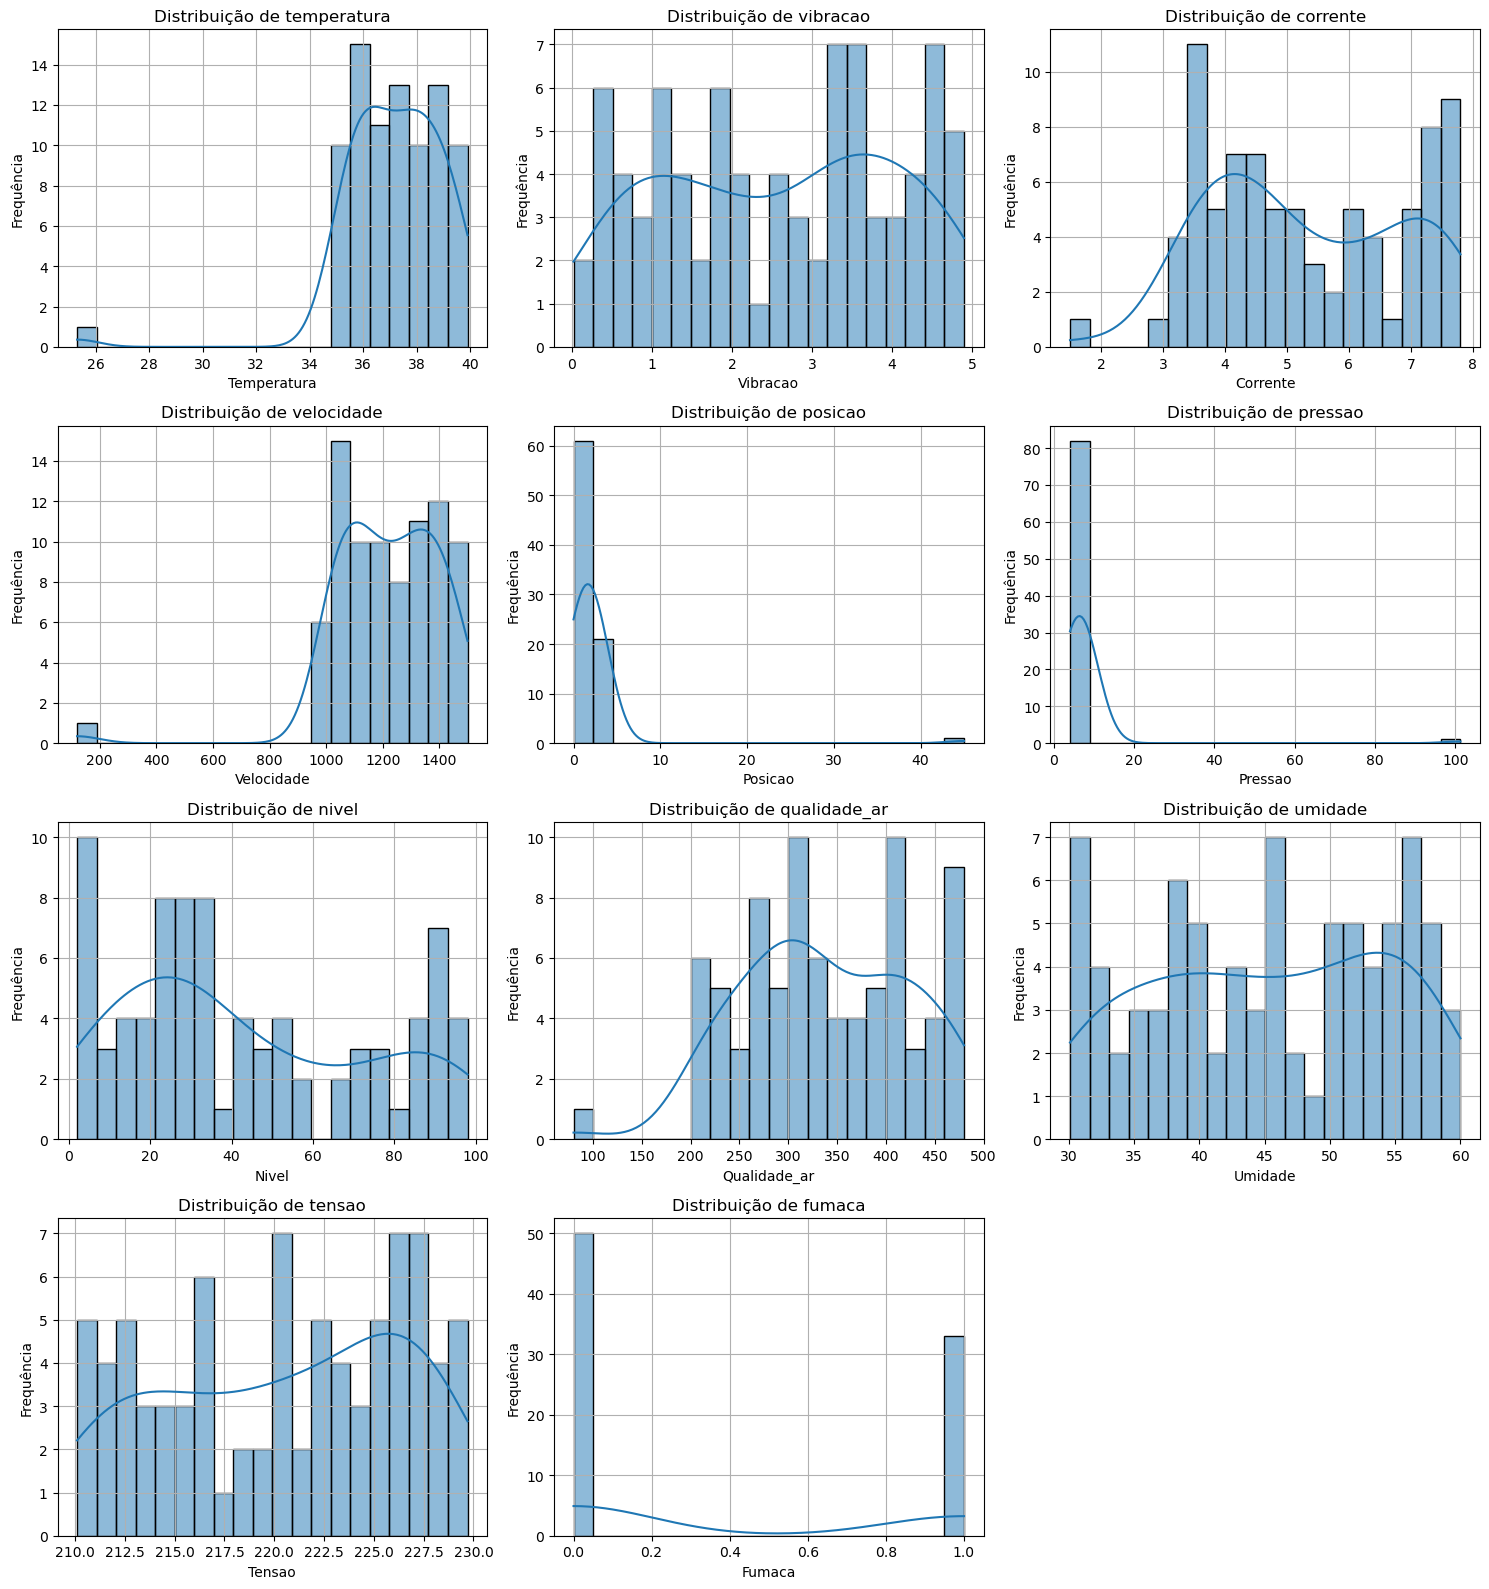

In [79]:
colunas_numericas = df.select_dtypes(include='number').drop(columns=['id']).columns

# Organiza os subplots
n = len(colunas_numericas)
ncols = 3  # número de colunas por linha
nrows = (n + ncols - 1) // ncols  # calcula o número de linhas

plt.figure(figsize=(5 * ncols, 4 * nrows))

for i, coluna in enumerate(colunas_numericas, 1):
    plt.subplot(nrows, ncols, i)
    sns.histplot(data=df, x=coluna, bins=20, kde=True)
    plt.title(f'Distribuição de {coluna}')
    plt.xlabel(coluna.capitalize())
    plt.ylabel('Frequência')
    plt.grid(True)

plt.tight_layout()
plt.show()


<a id='323'></a>
### 3.2.3. box plot

esse trecho de código gera graficos de boxplot para visualizar a distribuição, mediana e possíveis outliers de cada variável numérica com boxplots

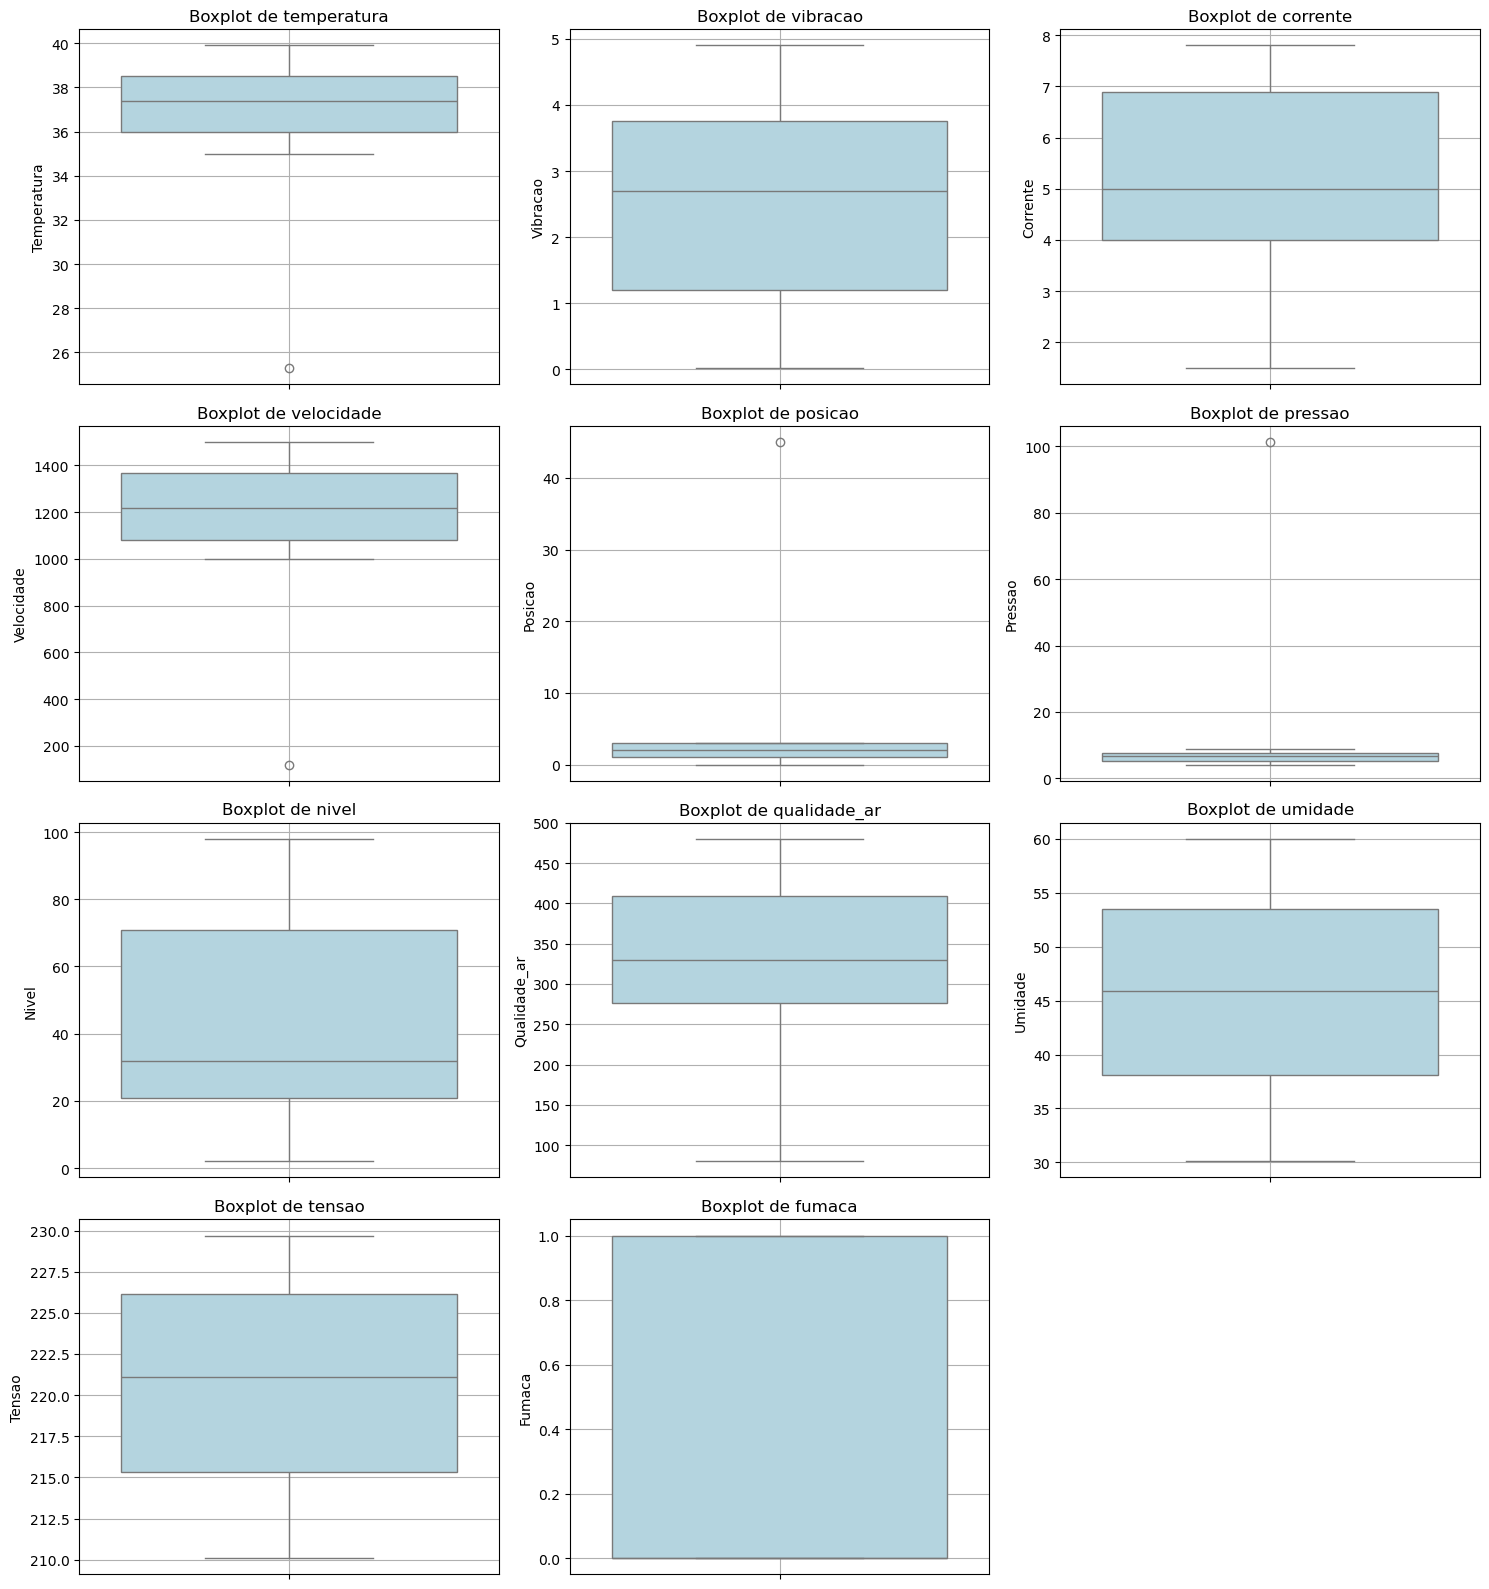

In [64]:
colunas_numericas = df.select_dtypes(include='number').drop(columns=['id']).columns

# Layout de subplots
n = len(colunas_numericas)
ncols = 3
nrows = (n + ncols - 1) // ncols

plt.figure(figsize=(5 * ncols, 4 * nrows))

for i, coluna in enumerate(colunas_numericas, 1):
    plt.subplot(nrows, ncols, i)
    sns.boxplot(data=df, y=coluna, color='lightblue')
    plt.title(f'Boxplot de {coluna}')
    plt.ylabel(coluna.capitalize())
    plt.grid(True)

plt.tight_layout()
plt.show()


<a id='324'></a>
### 3.2.4 Matriz de Correlação Linear

este trecho de código gera um heatmap para visualizar a matriz de correlação linear, para analisar a correlação linear entre as variáveis numéricas, ou seja, identificar relações fortes, fracas ou inexistentes entre pares de variáveis

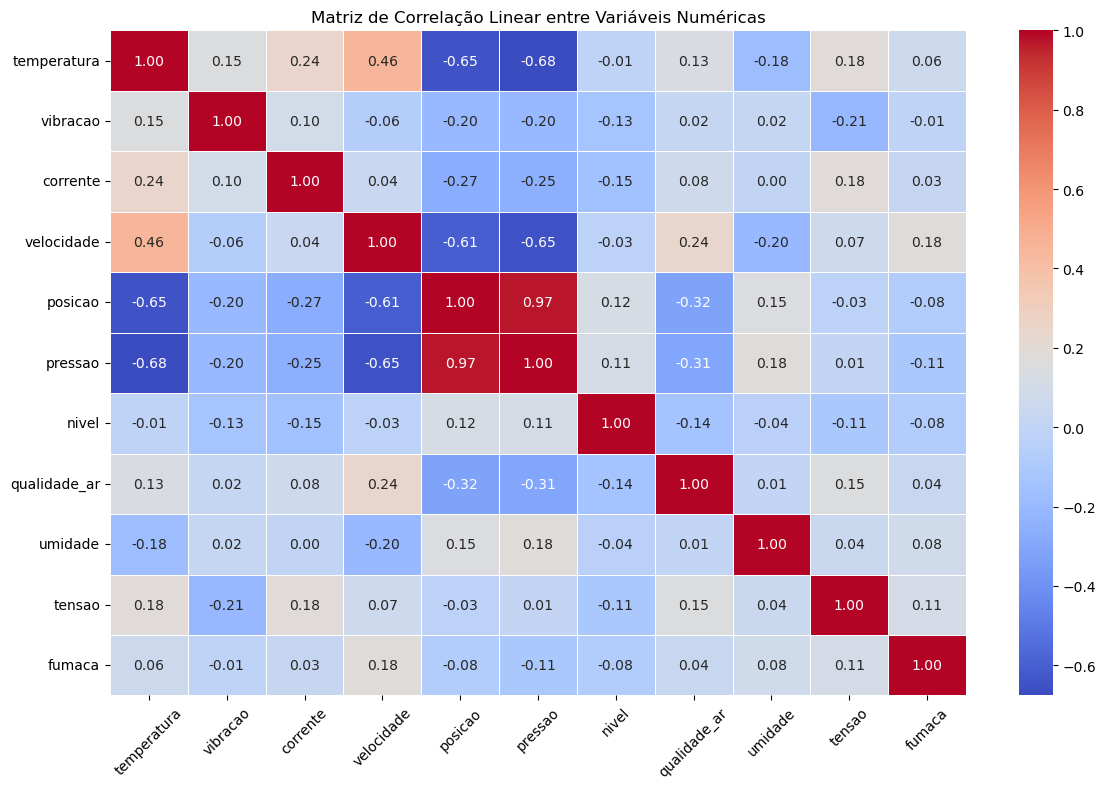

In [72]:
colunas_numericas = df.select_dtypes(include='number').drop(columns=['id'])

# Calcula a matriz de correlação
matriz_correlacao = colunas_numericas.corr()

# Plotando o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Matriz de Correlação Linear entre Variáveis Numéricas')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
